In [ ]:
import os
import pandas as pd

def combine_csv_files_to_dataframe(input_folder):
    # Create an empty list to hold DataFrames
    all_dataframes = []

    # Loop through all files in the specified folder
    for filename in os.listdir(input_folder):
        if filename.endswith(".csv"):  # Check if the file is a CSV
            file_path = os.path.join(input_folder, filename)
            df = pd.read_csv(file_path)  # Read each CSV into a DataFrame
            all_dataframes.append(df)    # Append the DataFrame to the list

    # Combine all DataFrames in the list into one
    combined_df = pd.concat(all_dataframes, ignore_index=True)

    # Return the combined DataFrame
    return combined_df

# Example usage
input_folder = 'OoklaMobilePerformance_Telenor'  # Replace with the path to your folder containing CSVs

# Get the combined DataFrame
combined_df = combine_csv_files_to_dataframe(input_folder)


# An Example of A Very Simple Analysis

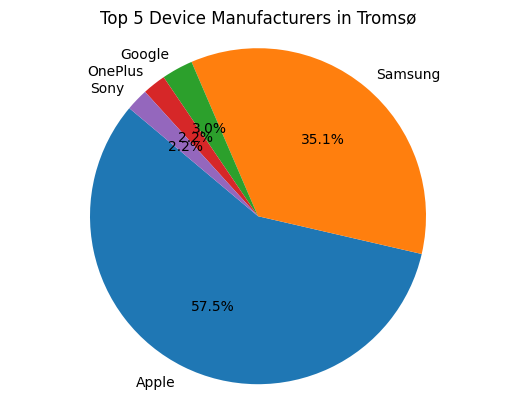

In [3]:
import matplotlib.pyplot as plt

#Check distinct values in column 'attr_place_subregion'
unique_values_subregion = combined_df['attr_place_subregion'].unique()

#Check distinct values in column 'attr_device_manufacturer'
unique_values_manufactureru = combined_df['attr_device_manufacturer'].unique()

#Select only a few columns 
selected_columns_df = combined_df[['attr_place_subregion', 'attr_device_manufacturer', 'id_device']]

#Remove Duplicate id_device
drop_dupes_id_device = selected_columns_df.drop_duplicates('id_device')

#Get subregion to filter on 
subregion = 'Tromsø'

#Filter to only show rows where subregion is Tromsø
filtered_df = selected_columns_df[combined_df['attr_place_subregion'] == subregion.strip()]

n=5
#Count how many times each manufacturer appears in the dataset and take the top n manufacturers 
manufacturer_counts = filtered_df['attr_device_manufacturer'].value_counts().head(n)

# Get the manufacturerers for labels 
manu_count_names = manufacturer_counts.index 

# Get the manufacturerers values which is the number of occurrences 
manu_count_values = manufacturer_counts.values 



plt.pie(manu_count_values, labels=manu_count_names , autopct='%1.1f%%', startangle=140)
plt.title(f'Top {n} Device Manufacturers in {subregion}')
plt.axis('equal') 
plt.show()